# ELE510 Image Processing with robot vision: LAB, Exercise 3, Histogram and point transformations

**Purpose:** *To learn about the image histogram, histogram equalization and image noise.*

The theory for this exercise can be found in chapter 3 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

The histogram for an image of a **black** cilinder and **white** background is $[5600,980,10,0,0,40,11200,80000]$, where 8 gray levels are used. 

The radius of the cilinder is $r = 85\text{mm}$ and the height is $h = 310\text{mm}$. The cilinder is perfectly oriented to only see the lateral area, but not the top or bottom of the cilinder. 

Use this information to find the pixel size, $\Delta x = \Delta y$.

**Describe the steps to arrive to the solution.**

We have $5600 + 980 + 10 = 6590$ dark pixels covering the lateral area of the cilinder. Since not all pixels are completely black, it might be that histogram equalization has been applied to the image beforehand, or there is some sort of lighting in the scene illuminating the cilinder.

Since the problem description does not provide any information about the lense, I assume weak projection has been used, i.e. the cilinder is a perfect rectangle in the image, and not distorted by a close up shot / something like a fish-lense.

Furthermore, I assume the size of the cilinder/rectangle **on the screen** is $2 \cdot 85\text{mm} \times 310\text{mm}$, and not the real size of the cilinder. This is because the problem description does not provide any information about the distance between the camera and the cilinder.

So: The cilinder covers a rectangle of $2 \cdot 85\text{mm} \times 310\text{mm}$ on the screen, which covers $6590$ pixels.

Area:
\begin{align*}
A &= 2 \cdot 85\text{mm} \times 310\text{mm} \\
  &= 52700\text{mm}^2
\end{align*}

Pixel area:
\begin{align*}
A_p &= \frac{52700\text{mm}^2}{6590} \\
	&\approx 8.0\text{mm}^2
\end{align*}

Since $\Delta x = \Delta y$, the size of each pixel is $\sqrt{\frac{52700\text{mm}^2}{6590}} \approx 2.82\text{mm}$.


## Problem 2

For images, such as `./images/christmas.png`, some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

**a)** Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=255). Show and explain the result using `./images/christmas.png` as an example. 



In [1]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    # Transform the image (RGB) to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    minimum = np.min(hsv[:,:,2])
    maximum = np.max(hsv[:,:,2])
    
    # Stretching the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hsv[i,j,2] = np.floor((hsv[i,j,2] - minimum) / (maximum - minimum) * 256 + 0.5)

    new_max = np.max(hsv[:,:,2])
    new_min = np.min(hsv[:,:,2])

    print("Old min: ", minimum, " Old max: ", maximum)
    print("New min: ", new_min, " New max: ", new_max)

    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

Old min:  98  Old max:  240
New min:  0  New max:  249


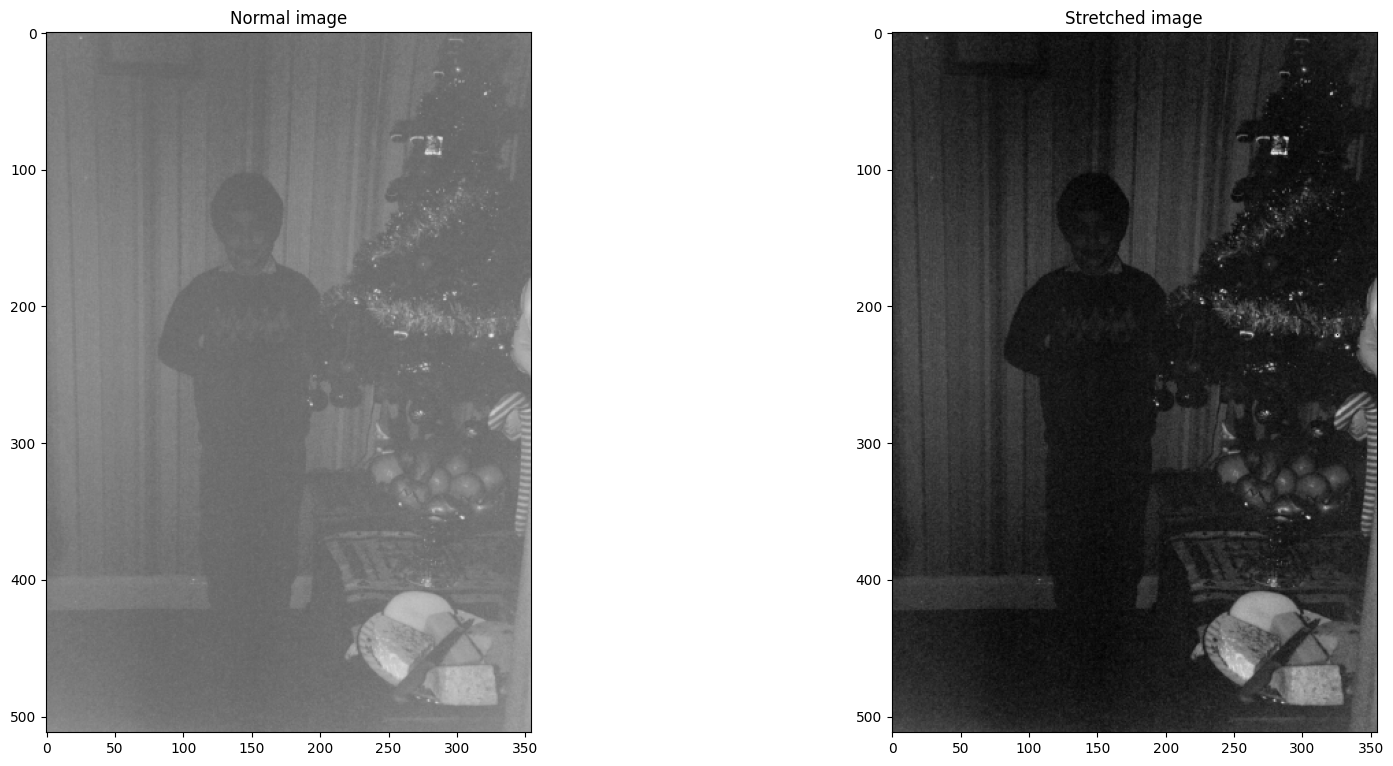

In [3]:
# Read the image and convert it to RGB channels
img = cv2.imread("./images/christmas.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use the function to improve the contrast of the image
img_stretch = histogram_stretch(img)

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img)
plt.title('Normal image')
plt.subplot(222)
plt.imshow(img_stretch)
plt.title('Stretched image')
plt.show()

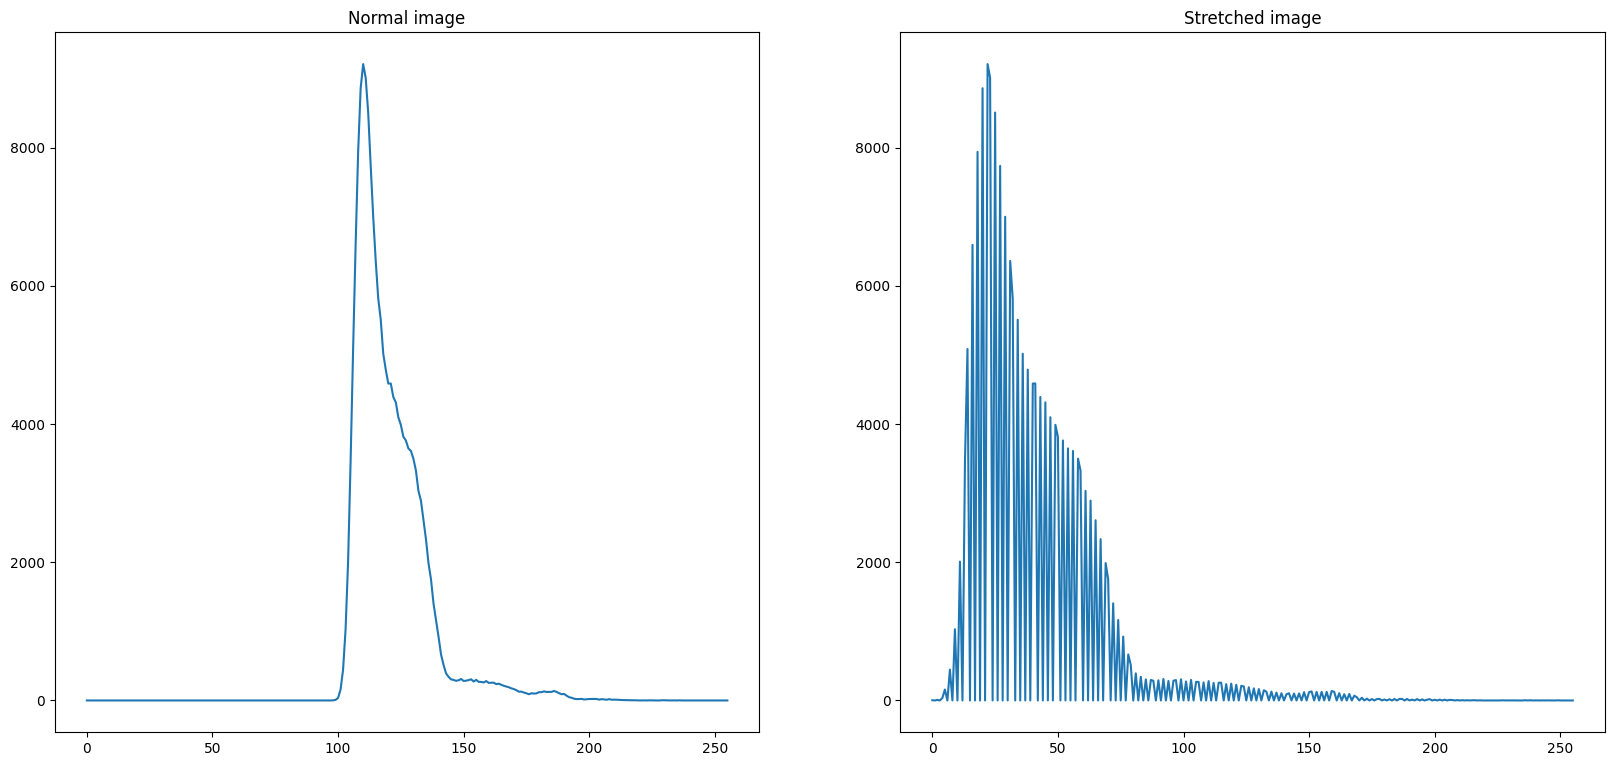

In [4]:
# For me: Plot the histograms
def plot_histogram(img):
    # Transform the image (RGB) to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    # Histrogram of the V channel
    hist, bins = np.histogram(hsv[:,:,2].flatten(), 256, (0, 255))

    # return plt figure
    return plt.plot(hist)

plt.figure(figsize=(20,20))
plt.subplot(221)
plot_histogram(img)
plt.title('Normal image')
plt.subplot(222)
plot_histogram(img_stretch)
plt.title('Stretched image')
plt.show()

The original images overall brightness was very mid-range, however there were very few bright spots in the image and no darker spots at all. Thus, when stretching the images brightness values to the full range, we do not really see the image get brighter at all, but actually a bit shift into the dark. This is the reason why the resulting image is darker than the original.

The new image uses more colors, but contrast isn't really increased at all - in the histograms we see that the original distribution is shifted a lot more, than it is being eualized.


## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    <p>1. Make a Python function or script that do histogram equalization <code>cv2.equalizeHist</code>, </p>
    <p>2. computes the histograms <code>plt.hist</code> for both the input image and the output image, </p>
    <p>3. and displays both images with histograms in the same figure (use <code>plt.figure</code> and <code>plt.subplot</code>).</p>
</details>


**a)** Use Python and find the histograms for the images. Plot the normalized cumulative distribution function (CDF) over the histogram.


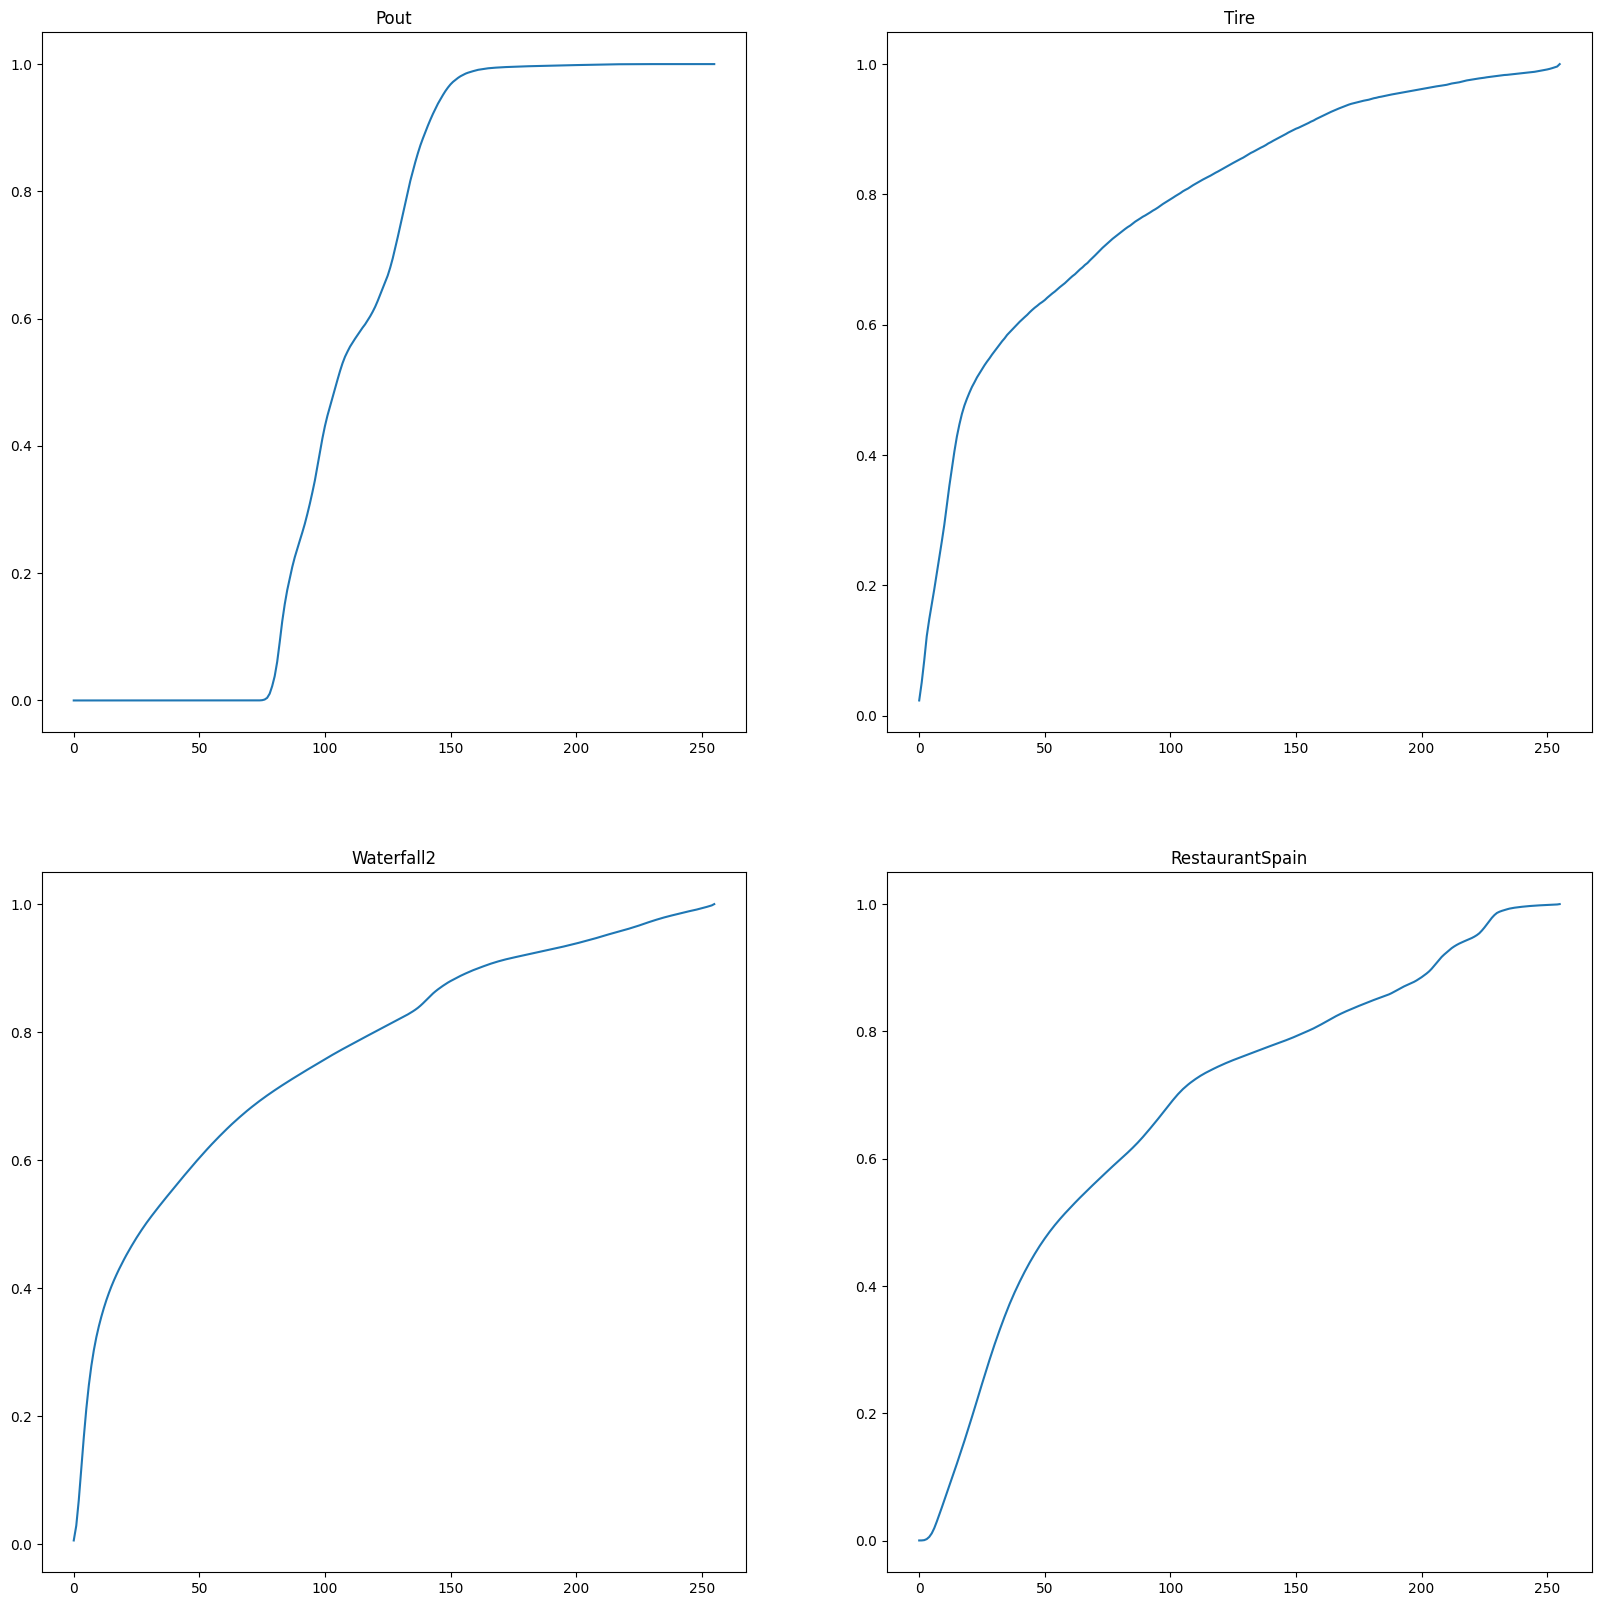

In [5]:
from typing import Dict, Tuple

images: Dict[str, np.ndarray] = {
    "Pout": cv2.imread("./images/pout.jpg", cv2.IMREAD_GRAYSCALE),
    "Tire": cv2.imread("./images/tire.jpg", cv2.IMREAD_GRAYSCALE),
    "Waterfall2": cv2.imread("./images/waterfall2.jpg", cv2.IMREAD_GRAYSCALE),
    "RestaurantSpain": cv2.imread("./images/restaurantSpain.jpg", cv2.IMREAD_GRAYSCALE),
}

def get_cumulative_histogram(img: np.ndarray) -> np.ndarray:
    histogram: np.ndarray = np.histogram(img.flatten(), 256, (0, 255))[0]
    normalized_histogram: np.ndarray = histogram / (img.shape[0] * img.shape[1])
    return normalized_histogram.cumsum()

def get_cumulative_histograms(images: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
    return {name: get_cumulative_histogram(img) for name, img in images.items()}

plt.figure(figsize=(20,20))
for i, (name, hist) in enumerate(get_cumulative_histograms(images).items()):
    plt.subplot(2, 2, i + 1)
    plt.plot(hist)
    plt.title(name)
plt.show()


**b)** Perform histogram equalization of these images and find the new histograms.  Plot the normalized CDF over the new histogram. Discuss the effect of the equalization over the histogram and its CDF.


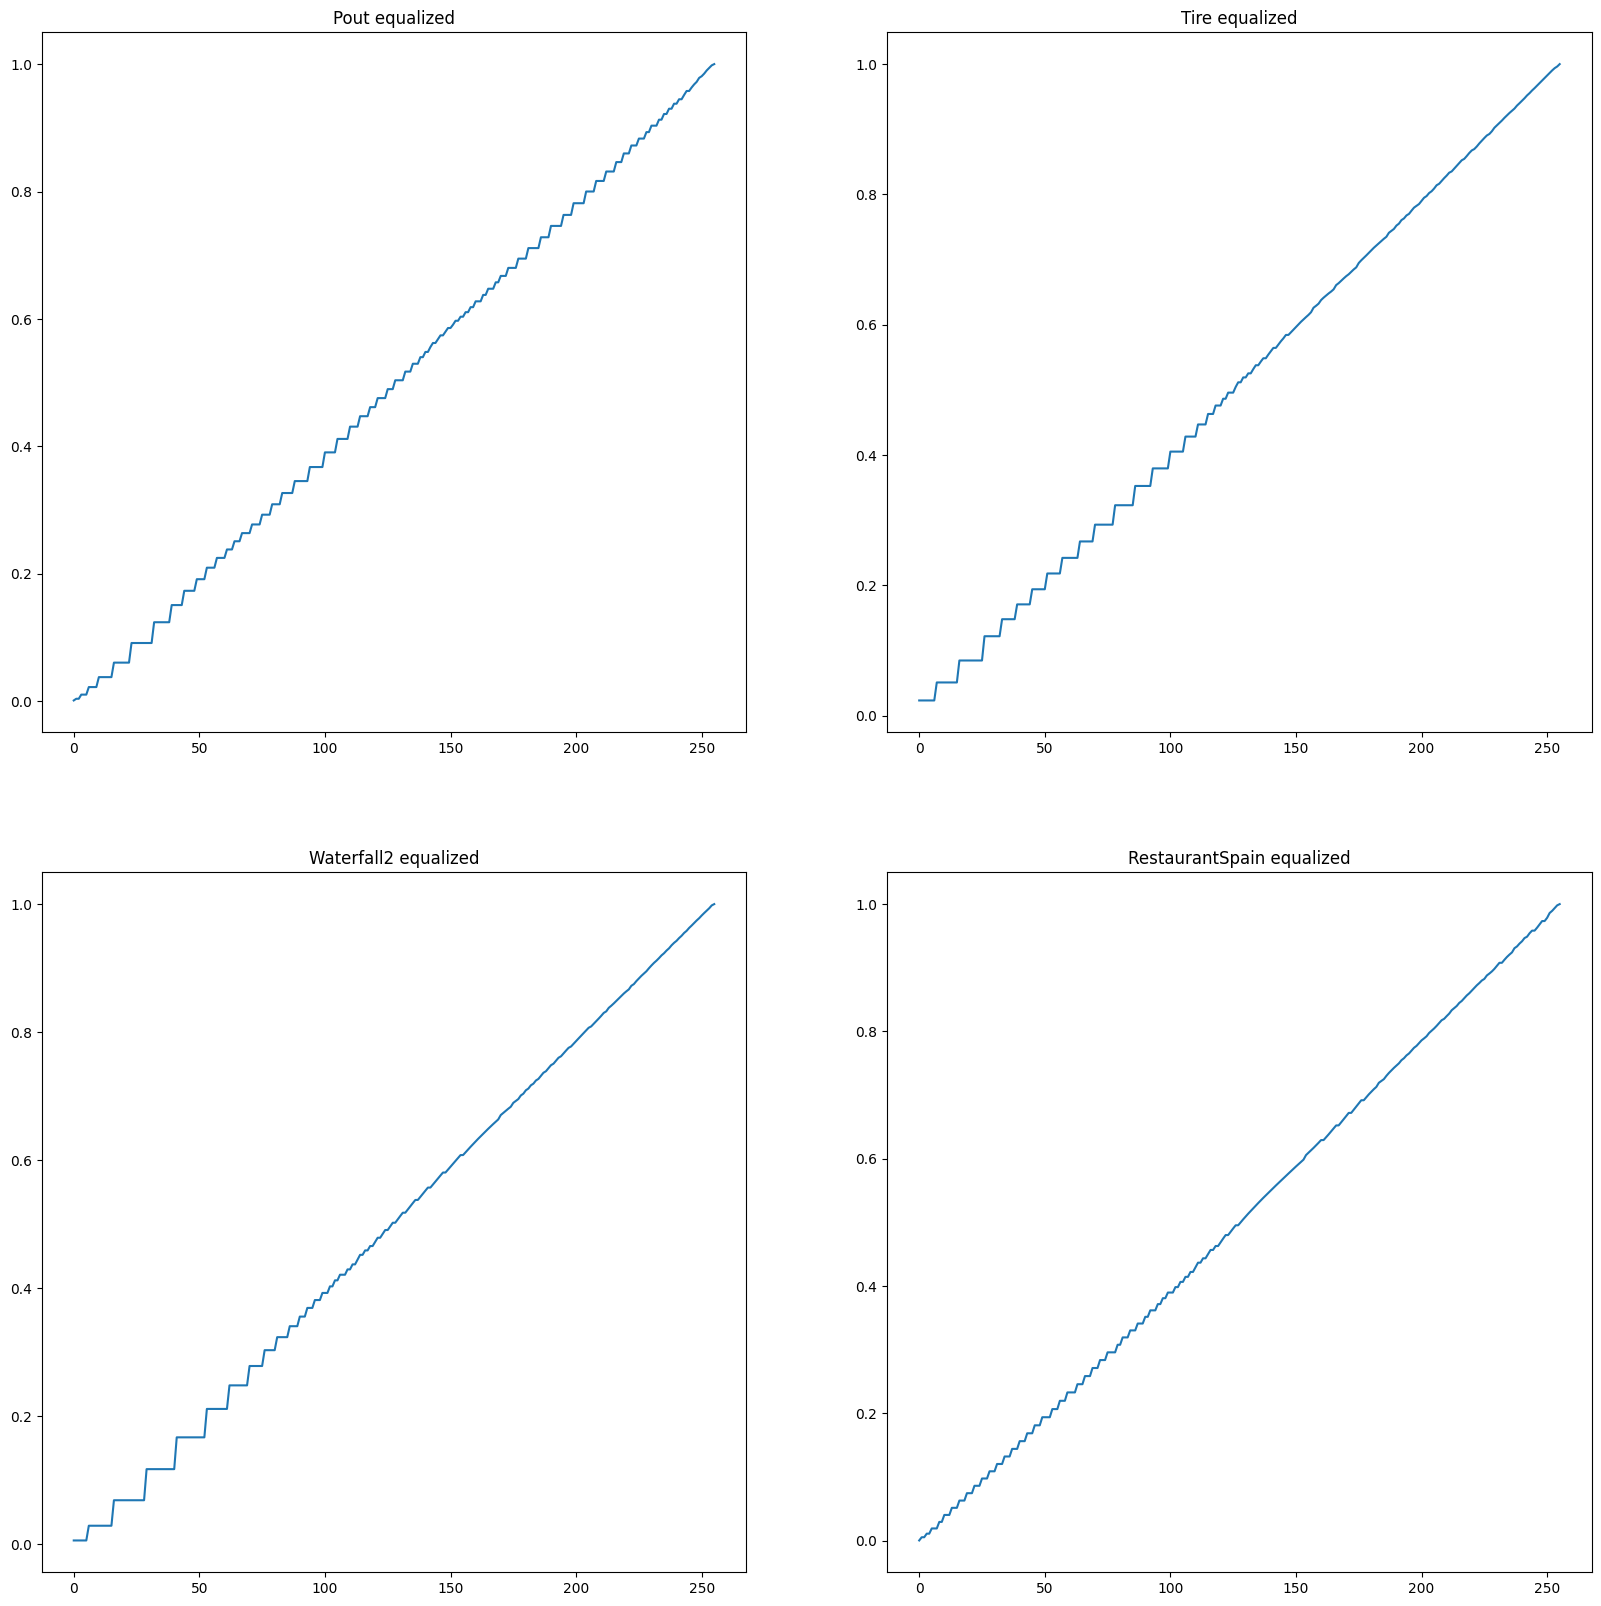

In [6]:
equalized_images: Dict[str, np.ndarray] = {
    name: cv2.equalizeHist(img) for name, img in images.items()
}

plt.figure(figsize=(20,20))
for i, (name, hist) in enumerate(get_cumulative_histograms(equalized_images).items()):
    plt.subplot(2, 2, i + 1)
    plt.plot(hist)
    plt.title(f"{name} equalized")
plt.show()

As we know from the lecture (and in c)), it is almost impossible to perfectly equalize a histogram due to the use of discrete values. We can see these imperfections in the staircase structures - a perfectly equalized CDF would be of course a straight line.

What one can notice, however, is that the locations of the original CDF with extreme gradients (i.e. far from the distance of the perfectly equalized / linear CDF) these staircase structures become more prevalent and extreme in the equalized CDF.


**c)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.

Since in the histograms of images the brightness values (x-axis) and the counts (y-axis) are both discrete, it is challenging to create a perfectly flat (equalized) histogram - especially since we want a uniform mapping of the old brightness values to the new brightness values, i.e. two pixels that have the same brightness in the old image have the same brightness in the new image.

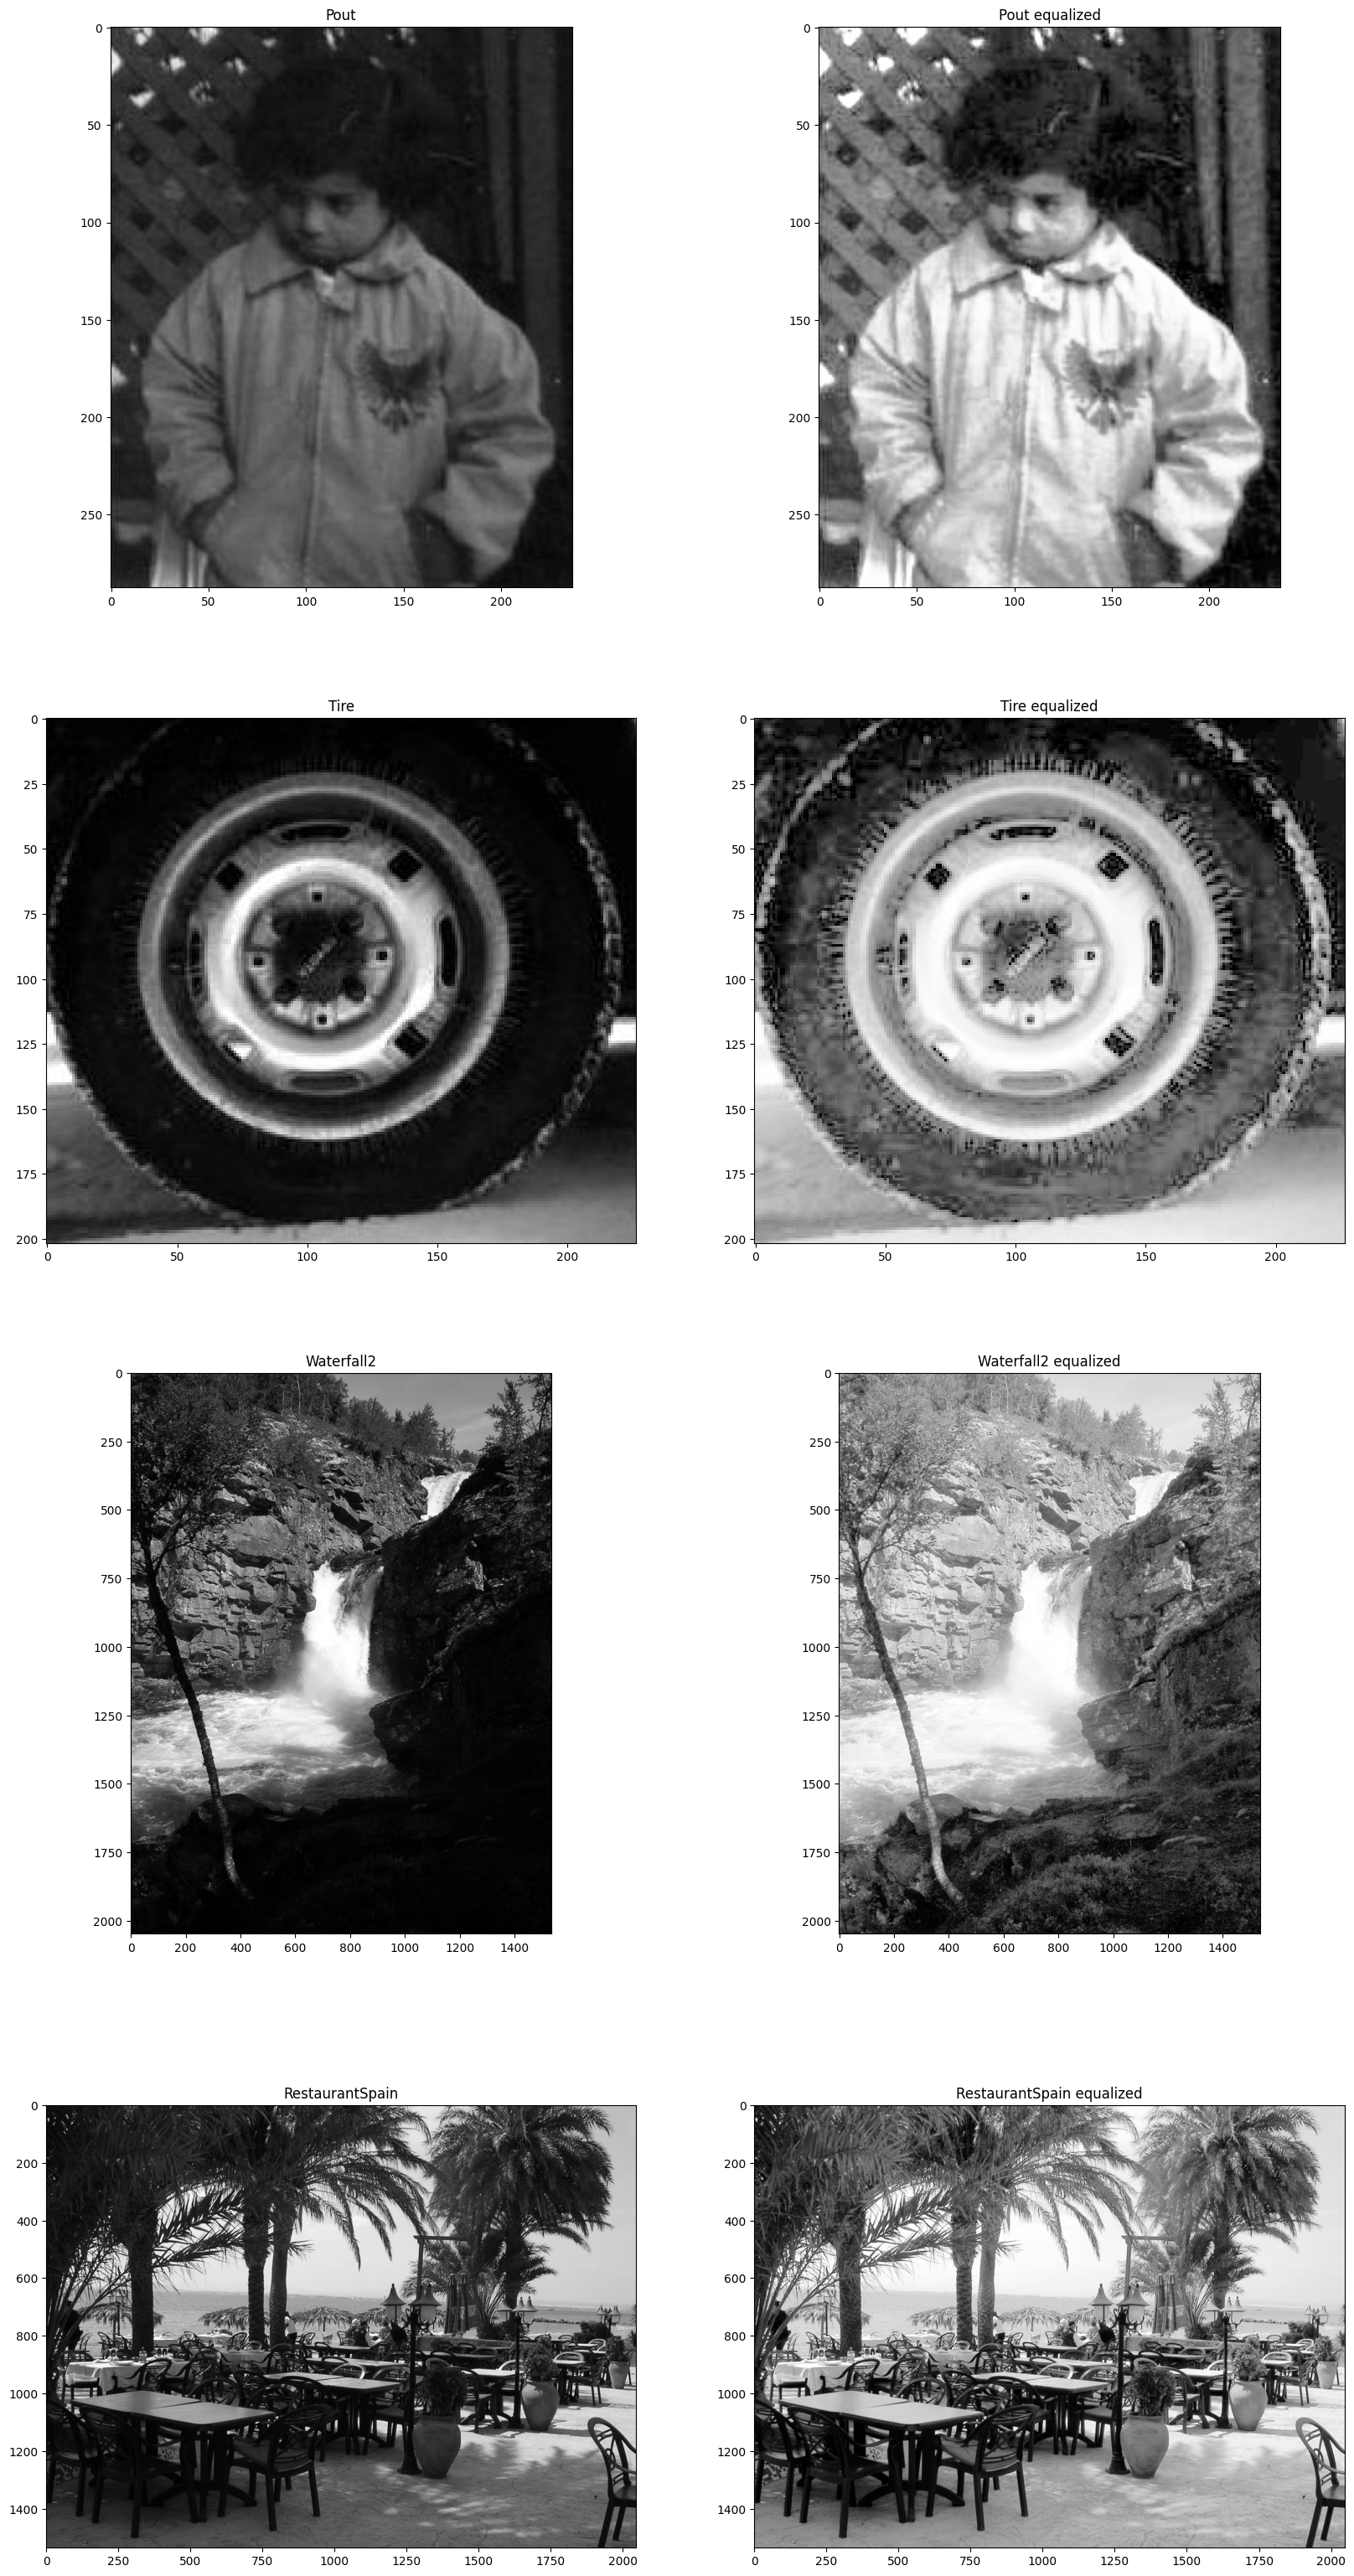

In [7]:
# For me: Plot original image and equalized image side by side

plt.figure(figsize=(20,40))
for i, (name, img) in enumerate(images.items()):
    plt.subplot(4, 2, 2*i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(name)
    plt.subplot(4, 2, 2*i + 2)
    plt.imshow(equalized_images[name], cmap="gray")
    plt.title(f"{name} equalized")
plt.show()


## Problem 4

Noise is a common problem in digital images. 
In this problem we want to study estimation of camera noise. 
We have a set of $K$ images. 
The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image we have:
$g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is the $k$-th image with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
\end{equation}

Then it can be shown that
\begin{equation}
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}

and

\begin{equation}
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}


**a)** Show how to derive these two results using the first equation and the information given in the text.

From the context I assume the noise is additive **gaussian** - otherwise the desired equations cannot be derived.

Since the noise is gaussian, the mean of the noise is zero, i.e. $E\left[\eta_k(x,y)\right] = 0$.

\begin{align*}
E\left[\overline{g(x,y)}\right] &= E\left[\frac{1}{K} \sum_{k=1}^K g_k(x,y) \right] \\
&= \frac{1}{K} \sum_{k=1}^K E\left[g_k(x,y)\right] \\
&= \frac{1}{K} \sum_{k=1}^K E\left[f(x,y) + \eta_k(x,y)\right] \\
&= \frac{1}{K} \sum_{k=1}^K f(x,y) + E\left[\eta_k(x,y)\right] \\
&= \frac{1}{K} \sum_{k=1}^K f(x,y) \\
&= f(x,y)
\end{align*}

\begin{align*}
\sigma^{2}_{\overline{g(x,y)}} &= Var\left[\overline{g(x,y)}\right] \\
&=  Var\left[\frac{1}{K} \sum_{k=1}^K g_k(x,y) \right] \\
&\stackrel{*}{=} \frac{1}{K^2} \sum_{k=1}^K Var\left[g_k(x,y)\right] \\
&= \frac{1}{K^2} \sum_{k=1}^K Var\left[f(x,y) + \eta_k(x,y)\right] \\
&= \frac{1}{K^2} \sum_{k=1}^K Var\left[\eta_k(x,y)\right] \\
&= \frac{1}{K^2} \sum_{k=1}^K \sigma^2_{\eta(x,y)} \\
&= \frac{1}{K^2} K \sigma^2_{\eta(x,y)} \\
&= \frac{1}{K} \sigma^2_{\eta(x,y)}
\end{align*}

Notes:
 - *: The noise for the different images are uncorrelated, so the covariance is zero.

## 
### Delivery (dead line) on CANVAS: 22.09.2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no


### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.